In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import glob

In [3]:
figsize(10, 8)

In [4]:
def naive_map(data,ra,dec,ra_num_bins=60,dec_num_bins=50):
    ra_bins = np.linspace(ra.min(),ra.max(),ra_num_bins)
    dec_bins = np.linspace(dec.min(),dec.max(),dec_num_bins)
    p,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins),weights=data)
    hits,_,_ = np.histogram2d(ra,dec,bins=(ra_bins,dec_bins))
    return p, hits, ra_bins, dec_bins

In [5]:
rc = 335.7
dc = 63.4

In [20]:
def calculate_flux(bank='A', session='5', doplot=True):
    dataf = np.load('/home/mabitbol/GBT-S140/datamaps/datamaps_'+bank+'_'+session+'.npz')
    tmask = dataf['tmask']
    ras = dataf['ras'][tmask]
    decs = dataf['decs'][tmask]
    calibrated = dataf['calibrated'][tmask]
    
    radius = np.sqrt( (ras-rc)**2 + (decs-dc)**2)
    rmask = radius < 1.
    datamap, hits, rabins, decbins = naive_map(calibrated[rmask], ras[rmask], decs[rmask], 120, 120)
    mask = hits == 0
    signal = datamap / hits
    signal[mask] = np.nan
    
    if doplot:
        figure()
        pc = pcolormesh(rabins, decbins, signal.T)
        clim(-0.1, 0.1)
        cb = colorbar()
        xlabel('RA [degrees]')
        ylabel('DEC [degrees]')
        cb.set_label('Flux [Jy]')
    
    annulus = (radius > 80./60.) & (radius < 2.)
    datamap, hits, rabins, decbins = naive_map(calibrated[annulus], ras[annulus], decs[annulus], 240, 240)
    mask = hits == 0
    nullmap = datamap / hits
    nullmap[mask] = np.nan
    
    if doplot:
        figure()
        pc = pcolormesh(rabins, decbins, nullmap.T)
        clim(-0.1, 0.1)
        cb = colorbar()
        xlabel('RA [degrees]')
        ylabel('DEC [degrees]')
        cb.set_label('Flux [Jy]')
    
    beam1arcmin = ( (1./60.) * (np.pi / 180.) )**2
    if bank == 'A':
        cfreq = 4.575
    elif bank == 'B':
        cfreq = 5.625
    elif bank == 'C':
        cfreq = 6.125
    elif bank == 'D':
        cfreq = 7.175
    beam = 12.6 / cfreq
    actualbeam = ( (beam/60.) * (np.pi / 180.) )**2
    print ( np.nansum(signal - np.nanmedian(nullmap)) ) * beam1arcmin / actualbeam, 'Jy'
    return ( np.nansum(signal - np.nanmedian(nullmap)) ) * beam1arcmin / actualbeam
    #print ( np.nansum(signal - np.nanmean(nullmap)) ) * beam1arcmin / actualbeam, 'Jy'

In [21]:
freqs = [4.575, 5.625, 6.125, 7.175]

In [22]:
banks = ['A', 'B', 'C', 'D']

In [23]:
flux5 = []
for bank in banks:
    flux5.append(calculate_flux(bank, '5', doplot=False))

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in divide


42.5740238425 Jy
45.2840462714 Jy
46.5560606052 Jy
48.6700530367 Jy


In [24]:
flux2 = []
for bank in banks:
    flux2.append(calculate_flux(bank, '2', doplot=False))

42.7838960913 Jy
46.2489015144 Jy
48.1966430996 Jy
63.5945844028 Jy


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in divide


In [18]:
flux2 = []
for bank in banks:
    flux2.append(calculate_flux(bank, '2', doplot=False))

41.9295626812 Jy
45.1055781402 Jy
46.3156888744 Jy
58.6178969963 Jy


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in divide


In [25]:
flux3 = []
for bank in banks:
    flux3.append(calculate_flux(bank, '3', doplot=False))

46.4557357214 Jy
46.6506664261 Jy
47.5126861882 Jy
53.2685866928 Jy


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in divide


In [19]:
flux3 = []
for bank in banks:
    flux3.append(calculate_flux(bank, '3', doplot=False))

47.343960721 Jy
48.4550552516 Jy
49.3770259282 Jy
49.9650644652 Jy


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in divide


In [27]:
flux5 = []
for bank in banks:
    flux5.append(calculate_flux(bank, '5', doplot=False))

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in divide


42.5740238425 Jy
45.2840462714 Jy
46.5560606052 Jy
48.6700530367 Jy


In [28]:
flux2 = []
for bank in banks:
    flux2.append(calculate_flux(bank, '2', doplot=False))

42.7838960913 Jy
46.2489015144 Jy
48.1966430996 Jy
63.5945844028 Jy


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in divide


In [29]:
flux3 = []
for bank in banks:
    flux3.append(calculate_flux(bank, '3', doplot=False))

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide


46.4557357214 Jy
46.6506664261 Jy
47.5126861882 Jy
53.2685866928 Jy


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in divide


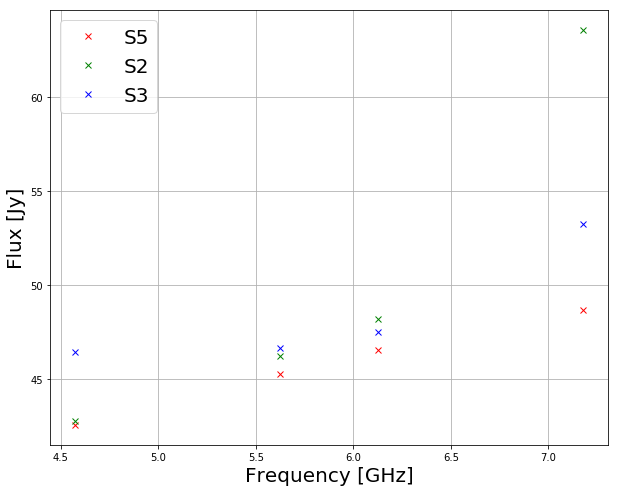

In [39]:
plot(freqs, flux5, 'rx', label='S5')
plot(freqs, flux2, 'gx', label='S2')
plot(freqs, flux3, 'bx', label='S3')
grid()
xlabel('Frequency [GHz]', fontsize=20)
ylabel('Flux [Jy]', fontsize=20)
legend(fontsize=20)

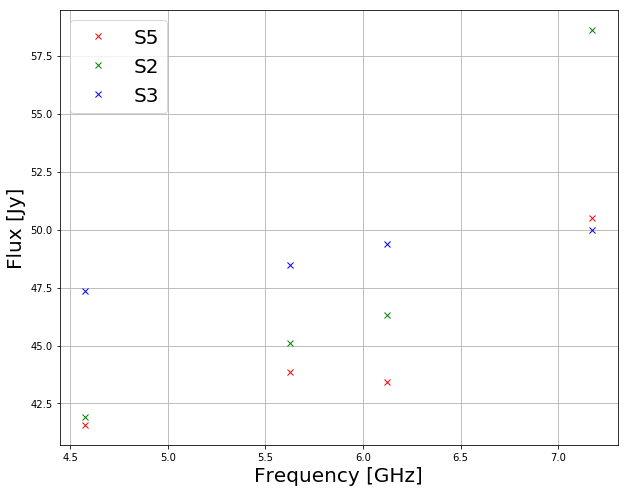

In [22]:
#moved over by .2 degrees ra
plot(freqs, flux5, 'rx', label='S5')
plot(freqs, flux2, 'gx', label='S2')
plot(freqs, flux3, 'bx', label='S3')
grid()
xlabel('Frequency [GHz]', fontsize=20)
ylabel('Flux [Jy]', fontsize=20)
legend(fontsize=20)

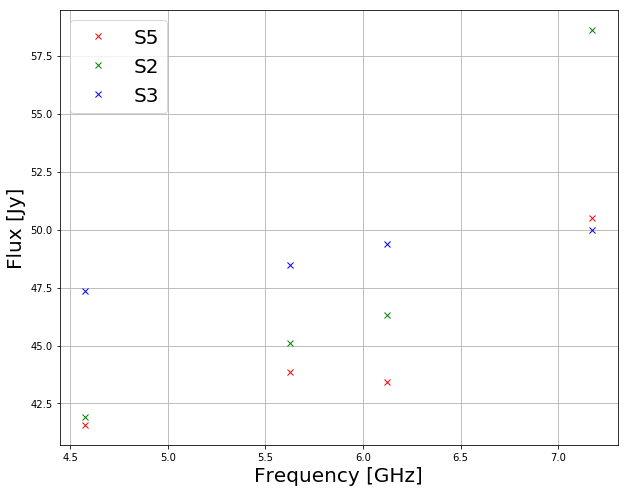

In [21]:
#meansub
plot(freqs, flux5, 'rx', label='S5')
plot(freqs, flux2, 'gx', label='S2')
plot(freqs, flux3, 'bx', label='S3')
grid()
xlabel('Frequency [GHz]', fontsize=20)
ylabel('Flux [Jy]', fontsize=20)
legend(fontsize=20)

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in divide


41.3404771302 Jy


41.34047713015984

/usr/lib64/python2.7/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


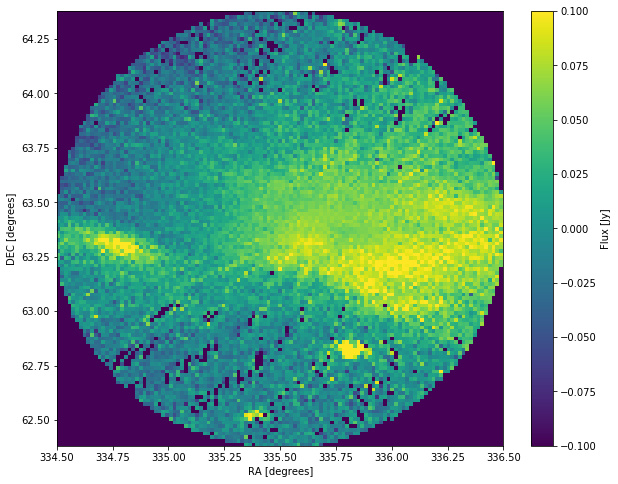

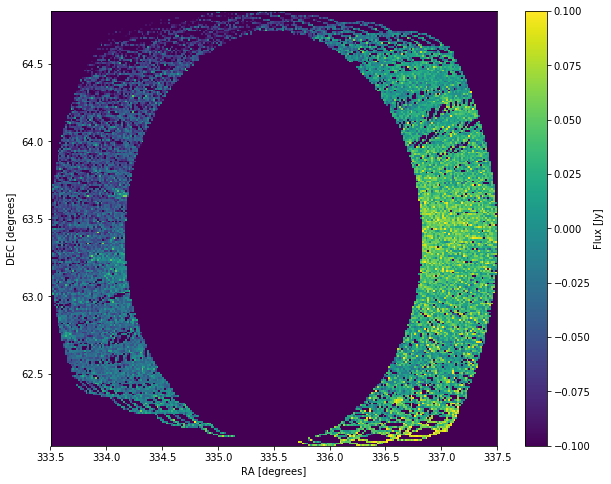

In [13]:
calculate_flux('A', '5')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in divide


45.2840462714 Jy
46.158755378 Jy


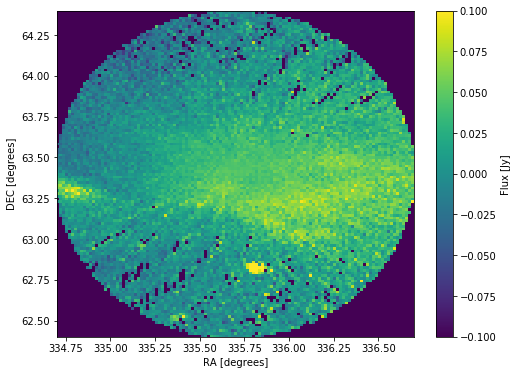

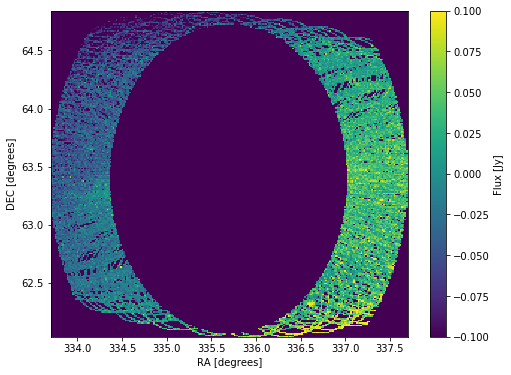

In [15]:
calculate_flux('B', '5')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in divide


46.5560606052 Jy
47.2625317117 Jy


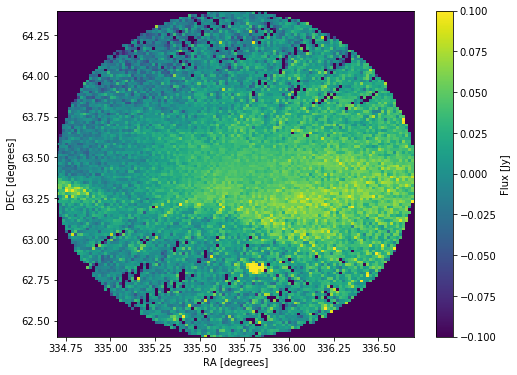

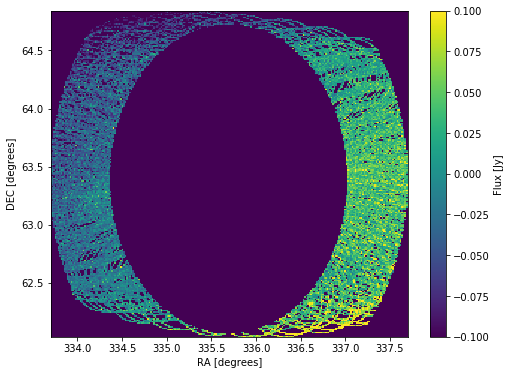

In [16]:
calculate_flux('C', '5')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in divide


48.6700530367 Jy
43.9987857394 Jy


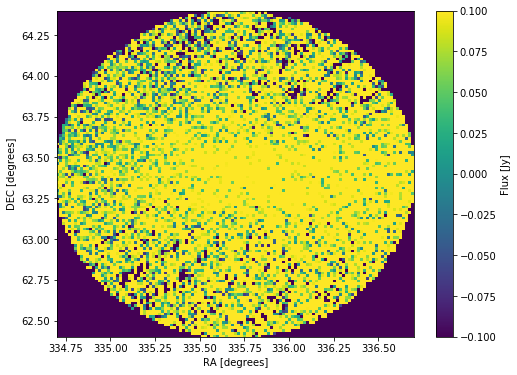

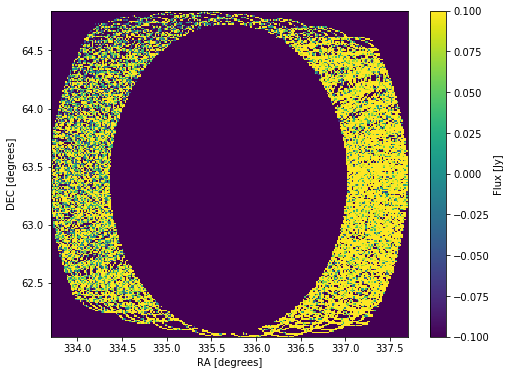

In [17]:
calculate_flux('D', '5')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in divide


42.7838960913 Jy
40.3567996664 Jy


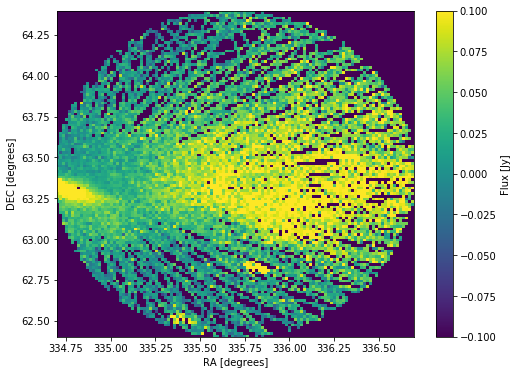

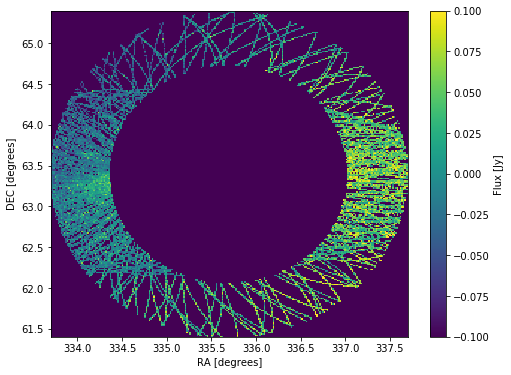

In [18]:
calculate_flux('A', '2')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in divide


46.2489015144 Jy
41.6113974534 Jy


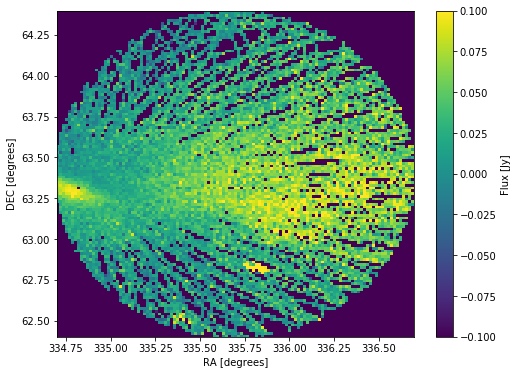

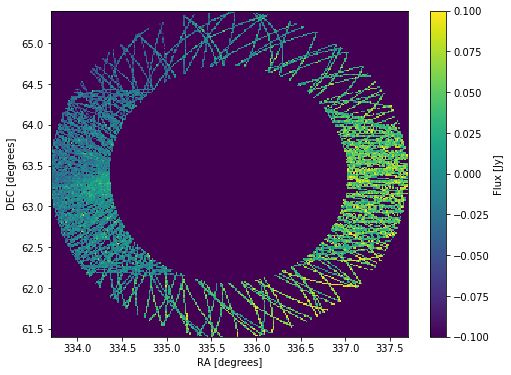

In [19]:
calculate_flux('B', '2')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in divide


48.1966430996 Jy
42.5045985374 Jy


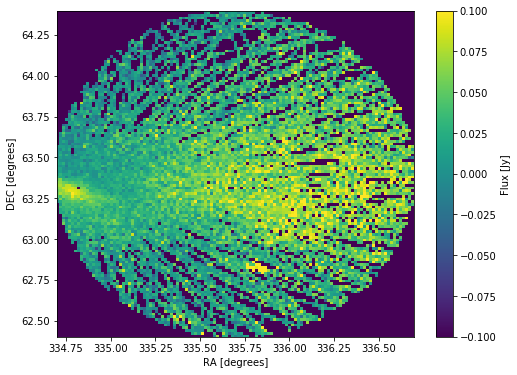

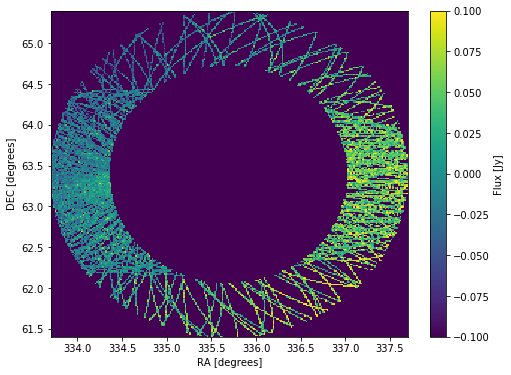

In [20]:
calculate_flux('C', '2')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in divide


63.5945844028 Jy
48.1865788326 Jy


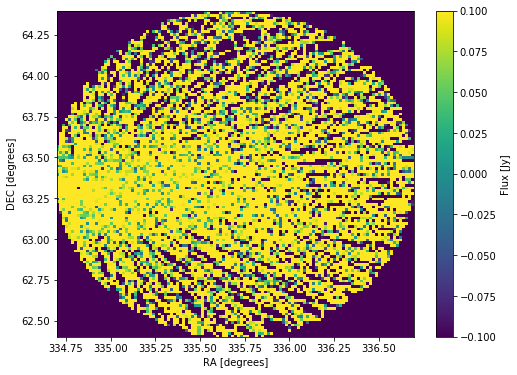

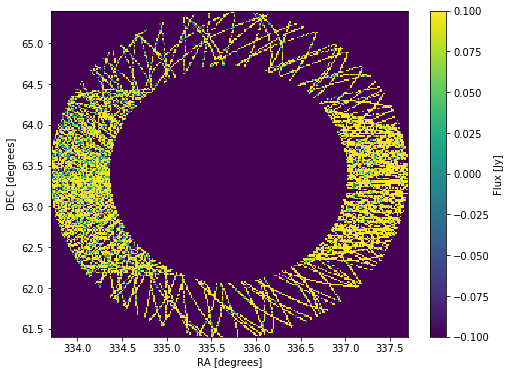

In [21]:
calculate_flux('D', '2')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in divide


46.4557357214 Jy
45.2639728612 Jy


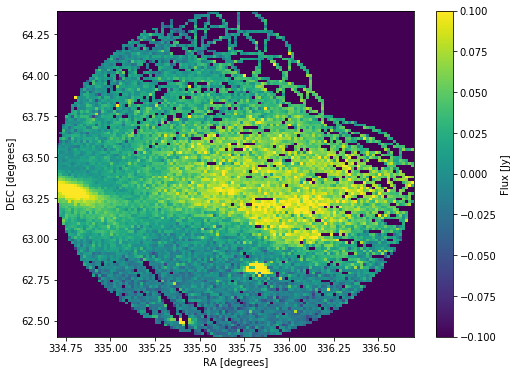

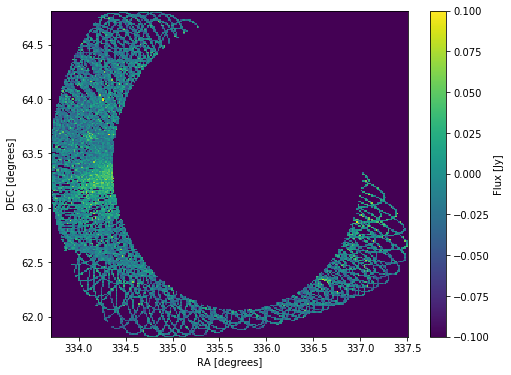

In [22]:
calculate_flux('A', '3')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in divide


46.6506664261 Jy
46.2196841472 Jy


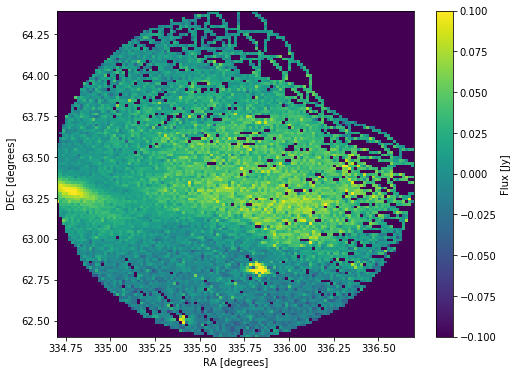

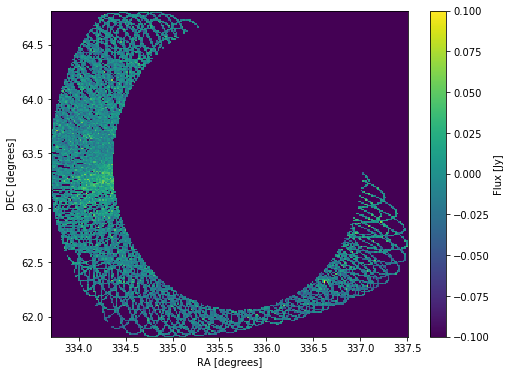

In [23]:
calculate_flux('B', '3')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in divide


47.5126861882 Jy
47.2489969188 Jy


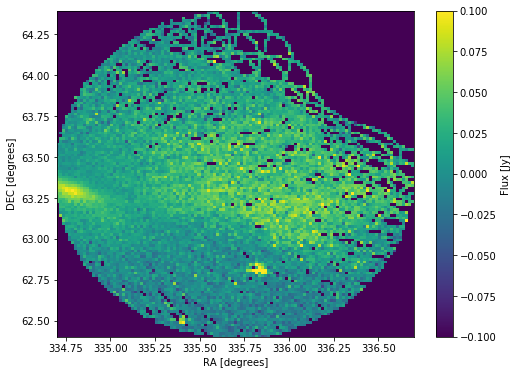

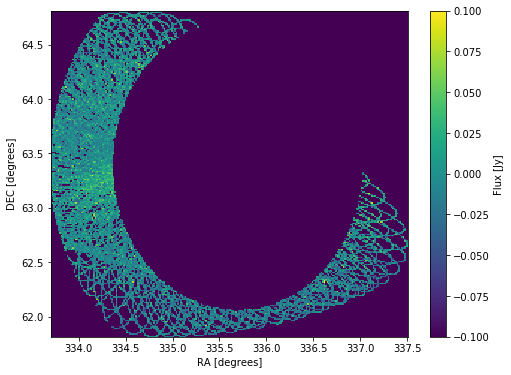

In [24]:
calculate_flux('C', '3')

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide
/usr/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in divide


53.2685866928 Jy
53.1713966777 Jy


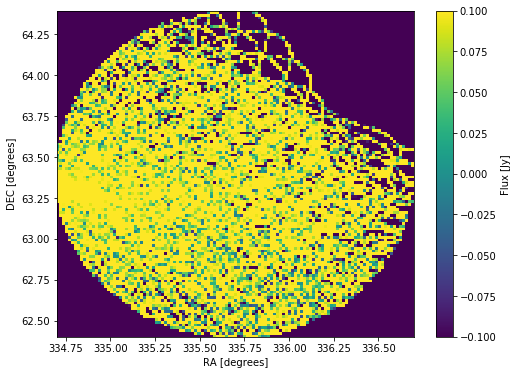

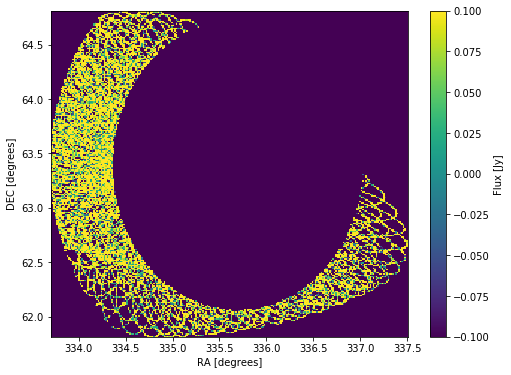

In [25]:
calculate_flux('D', '3')